In [1]:
print('This part is about connecting to a database and running queries on it.')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import sqlite3
conn = sqlite3.connect("////Users/kimi/sqlite/SQL_SAFI.sqlite")

This part is about connecting to a database and running queries on it.


In [2]:
print('This database is from Studying African Farmer-Led Irrigation, based on farmers in Mozambique and Tanzania.')
QUERY="""SELECT * FROM Crops"""
df_Crops=pd.read_sql_query(QUERY,conn)

This database is from Studying African Farmer-Led Irrigation, based on farmers in Mozambique and Tanzania.


In [4]:
print('We will look at the table called Crops.')
df_Crops.head()

We will look at the table called Crops.


,Id,plot_Id,crop_Id,D05_times,D_curr_crop,D_repeat_times_count
0,1,1,1,1,maize,1
1,1,2,1,1,maize,1
2,2,1,1,1,maize,1
3,2,2,1,1,tomatoes,1
4,2,3,1,1,vegetable,1


In [5]:
print('Here are the different crop types and their frequency of occurrence.')
df_Crops['D_curr_crop'].value_counts()


Here are the different crop types and their frequency of occurrence.


maize           392
rice            169
sorghum         125
tomatoes         99
vegetable        54
beans            43
sesame           24
other            24
onion            21
cabbage          14
piri_piri        11
baby_corn        11
peanut            9
sweetpotato       7
millet            7
pigeonpeas        6
cassava           4
bananas           4
green_pepper      3
manioc            2
potatoes          2
ngogwe            2
amendoim          2
green_beans       2
cucumber          1
sunflower         1
Name: D_curr_crop, dtype: int64

In [6]:
QUERY = """
SELECT D_curr_crop as crop,COUNT(*) as count
FROM Crops
group by crop
order by crop DESC
"""
pd.read_sql_query(QUERY,conn)

,crop,count
0,vegetable,54
1,tomatoes,99
2,sweetpotato,7
3,sunflower,1
4,sorghum,125
5,sesame,24
6,rice,169
7,potatoes,2
8,piri_piri,11
9,pigeonpeas,6


In [6]:
print("We will look at the top five crop types.")
QUERY1="""SELECT *, count(D_curr_crop) as count FROM Crops
GROUP BY D_curr_crop
ORDER BY count(D_curr_crop) DESC"""
df_currCrop=pd.read_sql_query(QUERY1,conn)
df_currCrop.head()

We will look at the top five crop types.


,Id,plot_Id,crop_Id,D05_times,D_curr_crop,D_repeat_times_count,count
0,1,1,1,1,maize,1,392
1,134,2,1,1,rice,1,169
2,4,3,1,1,sorghum,1,125
3,2,2,1,1,tomatoes,1,99
4,2,3,1,1,vegetable,1,54


In [7]:
print('Just getting rid of the index column.')
df_currCrop.set_index('D_curr_crop',inplace=True)

Just getting rid of the index column.


In [8]:
print("We are taking the top ten crops as a separate dataframe.")
df_topCrop=df_currCrop.head(10).copy()

We are taking the top ten crops as a separate dataframe.


Here is a pie chart of the top ten crops and the percentage of each, within the top ten.


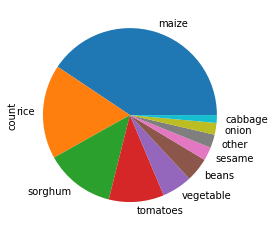

In [9]:
print("Here is a pie chart of the top ten crops and the percentage of each, within the top ten.")
df_topCrop['count'].plot(kind='pie')

In [13]:
#df_topCrop['count'].plot(kind='hist')

In [10]:
print("Once again, looking at the top five from the top ten.")
df_topCrop.head()

Once again, looking at the top five from the top ten.


,Id,plot_Id,crop_Id,D05_times,D_repeat_times_count,count
D_curr_crop,,,,,,
maize,1,1,1,1,1,392
rice,134,2,1,1,1,169
sorghum,4,3,1,1,1,125
tomatoes,2,2,1,1,1,99
vegetable,2,3,1,1,1,54


In [11]:
print('Goodbye, database!')

Goodbye, database!


In [12]:
conn.close()

In [13]:
print('Now we will try some web scraping.')
from bs4 import BeautifulSoup

Now we will try some web scraping.


In [15]:
print('This is page with a smallish table of hex codes for different colors. We will pull the colors and codes.')
print('First, we get the text. Then we find the table on it. Of course we have already looked at it and determined there is only one table.')
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/HTMLColorCodes.html"
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html5lib")
table = soup.find('table') 

This is page with a smallish table of hex codes for different colors. We will pull the colors and codes.
First, we get the text. Then we find the table on it. Of course we have already looked at it and determined there is only one table.


In [16]:
print('Now, we look through each row and pull the color name and hex code, and print those out.')
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[2].getText() # store the value in column 3 as color_name
    color_code = cols[3].getText() # store the value in column 4 as color_code
    print("{}\t--->\t{}".format(color_name,color_code))

Now, we look through each row and pull the color name and hex code, and print those out.
Color Name	--->	Hex Code#RRGGBB
lightsalmon	--->	#FFA07A
salmon	--->	#FA8072
darksalmon	--->	#E9967A
lightcoral	--->	#F08080
coral	--->	#FF7F50
tomato	--->	#FF6347
orangered	--->	#FF4500
gold	--->	#FFD700
orange	--->	#FFA500
darkorange	--->	#FF8C00
lightyellow	--->	#FFFFE0
lemonchiffon	--->	#FFFACD
papayawhip	--->	#FFEFD5
moccasin	--->	#FFE4B5
peachpuff	--->	#FFDAB9
palegoldenrod	--->	#EEE8AA
khaki	--->	#F0E68C
darkkhaki	--->	#BDB76B
yellow	--->	#FFFF00
lawngreen	--->	#7CFC00
chartreuse	--->	#7FFF00
limegreen	--->	#32CD32
lime	--->	#00FF00
forestgreen	--->	#228B22
green	--->	#008000
powderblue	--->	#B0E0E6
lightblue	--->	#ADD8E6
lightskyblue	--->	#87CEFA
skyblue	--->	#87CEEB
deepskyblue	--->	#00BFFF
lightsteelblue	--->	#B0C4DE
dodgerblue	--->	#1E90FF


In [18]:
print('OK, now we are moving on to something else.')
print('Github posts job-opening announcements.')
print(' We will use Requests to pull the JSON code for them and save it as a file called data.')
baseurl = "https://jobs.github.com/positions.json"
response=requests.get(baseurl)
if response.ok:
    data=response.json()
print(type(data)) 

OK, now we are moving on to something else.
Github posts job-opening announcements.
 We will use Requests to pull the JSON code for them and save it as a file called data.
<class 'list'>


In [19]:
print('We will look through the listings and pull the descriptions.')
def get_number_of_jobs(technology):
    number_of_jobs = 0
    
    page=1
    new_results=1
    while new_results>0:
        payload={"description":technology,"page":page}
        r=requests.get(baseurl,payload)
        new_results =len(r.json())
        page+=1
        number_of_jobs+=(len(r.json()))
         
    return technology,number_of_jobs

We will look through the listings and pull the descriptions and count them.


In [20]:
print('We have a predetermined list of programming languages that we will earch for.')
print('We are counting how many listings there are for each programming language.')
tech_list=['C','C%23','C++','Java','JavaScript','Python','Scala','Oracle','SQL Server',\
           'MySQL Server','PostgreSQL','MongoDB']
def get_job_list():
    job_list=[]
    for item in tech_list:
        job_list.append(get_number_of_jobs(item))
    return job_list

lyst=get_job_list()
print(lyst)

We have a predetermined list of programming languages that we will earch for.
We are counting how many listings there are for each programming language.
[('C', 173), ('C%23', 19), ('C++', 11), ('Java', 72), ('JavaScript', 50), ('Python', 44), ('Scala', 45), ('Oracle', 5), ('SQL Server', 15), ('MySQL Server', 8), ('PostgreSQL', 13), ('MongoDB', 6)]


In [21]:
print('This is a module that lets you save data from a dataframe to Excel.')
!pip3 install openpyxl
!pip3 install openpyxl --upgrade
from openpyxl import Workbook  

This is a module that lets you save data from a dataframe to Excel.
You should consider upgrading via the '/Users/kimi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/kimi/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [22]:
print('We are saving the jobs data to Excel.')
#lysty=[('C', 294), ('C%23', 30), ('C++', 24), ('Java', 124), ('JavaScript', 99), ('Python', 79), ('Scala', 69), ('Oracle', 12), ('SQL Server', 41), ('MySQL Server', 17), ('PostgreSQL', 21), ('MongoDB', 18)]
import pandas as pd
wb=Workbook()
ws=wb.active
df_jobs = pd.DataFrame(lyst, columns =['Language','jobs'])
ws.append(['Language','jobs'])
for bit in lyst:
    ws.append(bit)
wb.save("techJobs.xlsx")
print("done.")

We are saving the jobs data to Excel.
done.


In [23]:
print('Just locating the Excel file for later reference.')
import os
print(os.path.abspath("techJobs.xlsx"))

Just locating the Excel file for later reference.
/Users/kimi/projects/zeus1/virtuey/techJobs.xlsx


In [24]:
print('Now we will open the Excel file and read it into another.')
print('Then we will pull the data into a dataframe with the languages and count of job listings for each.')
import pandas as pd
wb=Workbook()
ws=wb.active
df_jobs = pd.DataFrame(lyst, columns =['Language','jobs'])
ws.append(['Language','jobs'])
for bit in lyst:
    ws.append(bit)
wb.save("github-job-postings.xlsx")
print(df_jobs)
print("done.")

Now we will open the Excel file and read it into another.
Then we will pull the data into a dataframe with the languages and count of job listings for each.
        Language  jobs
0              C   173
1           C%23    19
2            C++    11
3           Java    72
4     JavaScript    50
5         Python    44
6          Scala    45
7         Oracle     5
8     SQL Server    15
9   MySQL Server     8
10    PostgreSQL    13
11       MongoDB     6
done.


In [25]:
print('We will take a look at the top five languages.')
df_jobs.sort_values(by='jobs',ascending=False,inplace=True)
df_jobs.head()

We will take a look at the top five languages.


,Language,jobs
0,C,173
3,Java,72
4,JavaScript,50
6,Scala,45
5,Python,44


In [26]:
print('Here we will drop the index column.')
df_jobs.set_index('Language',inplace=True)

Here we will drop the index column.


And now we will plot the languages in a horizontal bar chart.


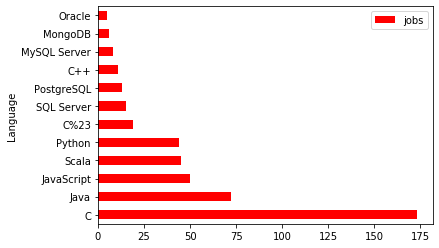

In [27]:
print('And now we will plot the languages in a horizontal bar chart.')
df_jobs.plot(kind='barh',color='red')
plt.title='Languages in demand according to Github'

In [28]:
print('Now we will use a new data set. This is from Kaggle and is about heart failure.')
print('A number of features are given for a population of patients who experienced heart failure.')
df_hf=pd.read_csv('heart_failure.csv')
print('Done.')

Now we will use a new data set. This is from Kaggle and is about heart failure.
A number of features are given for a population of patients who experienced heart failure.
Done.


In [29]:
print('Looking at the features in this data set.')
df_hf.columns

Looking at the features in this data set.


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [30]:
print('Looking at the first few rows to see what types of quantities we will encounter.')
df_hf.head()

Looking at the first few rows to see what types of quantities we will encounter.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [31]:
print('We will look at counts for some ages.')
df_hf.groupby('age').head()
df_hf['age'].value_counts().head()

We will look at counts for some ages.


60.0    33
50.0    27
65.0    26
70.0    25
45.0    19
Name: age, dtype: int64

Creatinine phosphokinase and its distribution in this population.


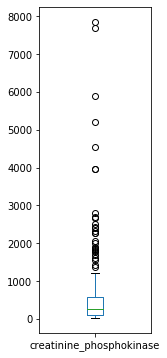

In [32]:
print('Creatinine phosphokinase and its distribution in this population.')
df_hf['creatinine_phosphokinase'].plot(kind='box',figsize=(2,6))

A similar exercise with serum sodium.


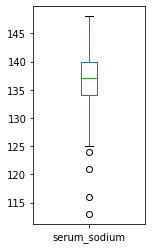

In [33]:
print('A similar exercise with serum sodium.')
df_hf['serum_sodium'].plot(kind='box',figsize=(2,4))

Plotting serum sodium as a function of creatinine phosphokinase. I do not know what this means.


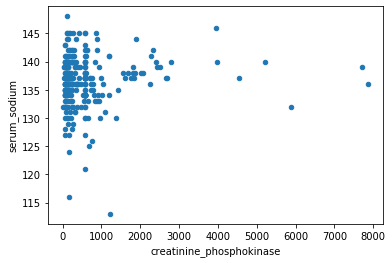

In [34]:
print('Plotting serum sodium as a function of creatinine phosphokinase. I do not know what this means.')
df_hf.plot(kind='scatter',x='creatinine_phosphokinase',y='serum_sodium')

In [35]:
print('We will look at the Pearson correlation coefficients for the various features.')
df_hf.corr(method='pearson')

We will look at the Pearson correlation coefficients for the various features.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [37]:
print('OK, at least I know what smoking and sex are. We will see if there is an interesting relationship between these and heart failure.')
df_smok=df_hf[['smoking','sex','DEATH_EVENT']].groupby('DEATH_EVENT')
df_smok.head()

OK, at least I know what smoking and sex are. We will see if there is an interesting relationship between these and heart failure.


,smoking,sex,DEATH_EVENT
0,0,1,1
1,0,1,1
2,1,1,1
3,0,1,1
4,0,0,1
14,0,0,0
20,0,0,0
23,0,1,0
33,0,0,0
38,0,1,0


In [38]:
print('Checking these features for correlation in a smaller table.')
df_smok.corr(method='pearson')

Checking these features for correlation in a smaller table.


smoking       sex
DEATH_EVENT                            
0           smoking  1.000000  0.486990
            sex      0.486990  1.000000
1           smoking  1.000000  0.358297
            sex      0.358297  1.000000

In [39]:
print('Now we will look at scatter plots for various heart-related features.')

Now we will look at scatter plots for various heart-related features.


Platelets vs. ejection fraction first.


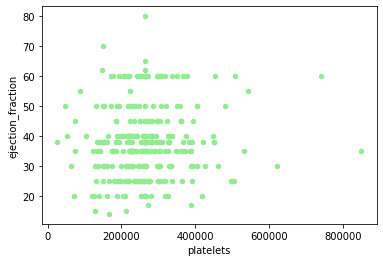

In [40]:
print('Platelets vs. ejection fraction first.')
df_hf.plot(kind='scatter',x='platelets',y='ejection_fraction',color='lightgreen')

Creatinine phosphokinase vs. platelets, weighted by age.


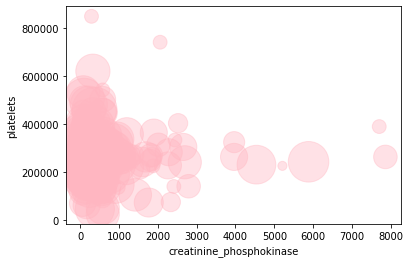

In [41]:
print('Creatinine phosphokinase vs. platelets, weighted by age.')
normAge=2000*(df_hf['age']-df_hf['age'].min())/(df_hf['age'].max()-df_hf['age'].min())+10
df_hf.plot(kind='scatter',x='creatinine_phosphokinase',y='platelets',s=normAge,color='lightpink',alpha=0.4)

Ejection fraction vs. serum sodium, weighted by platelets.


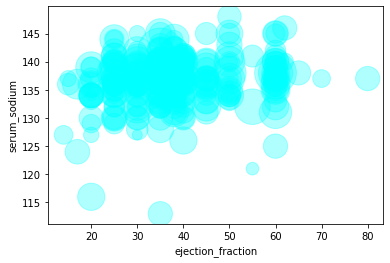

In [42]:
print('Ejection fraction vs. serum sodium, weighted by platelets.')
normPlate=2000*(df_hf['platelets']-df_hf['platelets'].min())/(df_hf['platelets'].max()-df_hf['platelets'].min())+10
df_hf.plot(kind='scatter',x='ejection_fraction',y='serum_sodium',s=normPlate,alpha=0.31,color='aqua')

In [43]:
print('Just curious what the ejection fraction is for this population.')
avgEjFrac=df_hf['ejection_fraction'].astype('float').mean(axis=0)

Just curious what the ejection fraction is for this population.


In [44]:
print(avgEjFrac)

38.08361204013378


In [45]:
print('In a similar manner, we will look at the median platelet count for these folks.')
mdnPlate=df_hf['platelets'].astype('float').median(axis=0)

In a similar manner, we will look at the median platelet count for these folks.


In [46]:
print(mdnPlate)

262000.0


In [47]:
print('Just checking the data types for the various features.')
df_hf.dtypes

Just checking the data types for the various features.


age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

We will look at a histogram of these people by serum sodium.


Text(0, 0.5, 'Count')

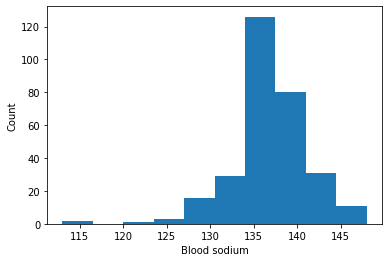

In [49]:
print('We will look at a histogram of these people by serum sodium.')
plt.hist(df_hf['serum_sodium'])
plt.xlabel('Blood sodium')
plt.ylabel('Count')

We will bin these folks into three categories and show their serum creatinine levels as low, middle, and high.


Text(0, 0.5, 'Count')

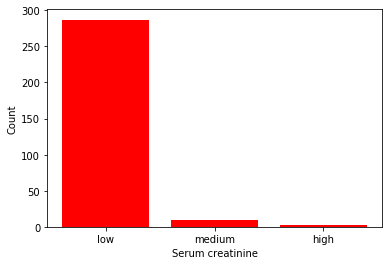

In [50]:
print('We will bin these folks into three categories and show their serum creatinine levels as low, middle, and high.')
bins=np.linspace(min(df_hf['serum_creatinine']),max(df_hf['serum_creatinine']),4)
group_names=['low','medium','high']
df_hf['sr_creat_binned']=pd.cut(df_hf['serum_creatinine'],bins,labels=group_names,include_lowest=True)
plt.bar(group_names,df_hf['sr_creat_binned'].value_counts(),color='red')
plt.xlabel('Serum creatinine')
plt.ylabel('Count')

In [51]:
print('Thank you, heart patients! We will move on to the next exercise.')
print('This data set from Kaggle is about test performance by students.')
print('This data set from Kaggle is unfortunately completely fabricated.')
df_sp=pd.read_csv('StudentsPerformance.csv')

Thank you, heart patients! We will move on to the next exercise.
This data set from Kaggle is about test performance by students.
This data set from Kaggle is unfortunately completely fabricated.


In [52]:
print('We will look at the column heads, although the data do not actually represent any real people.')
df_sp.head()

We will look at the column heads, although the data do not actually represent any real people.


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
print('Just looking at the educational level of the parents.')
df_sp.columns
df_sp['parental level of education'].value_counts()

Just looking at the educational level of the parents.


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [54]:
print('We will pull the race/ethnicity, gender, and math scores of the students into a dataframe.')
df_math=df_sp[['race/ethnicity','gender','math score']]
df_math.head()

We will pull the race/ethnicity, gender, and math scores of the students into a dataframe.


,race/ethnicity,gender,math score
0,group B,female,72
1,group C,female,69
2,group B,female,90
3,group A,male,47
4,group C,male,76


Here is a heat map of student scores vs. race/ethnicity and gender.
Sorry I didn't label the axes.


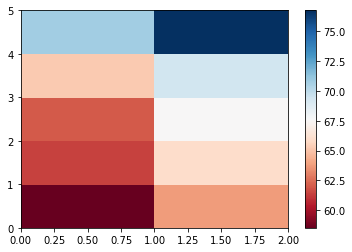

In [56]:
print('Here is a heat map of student scores vs. race/ethnicity and gender.')
print('Sorry I didn\'t label the axes.')
df_grpMath=df_math.groupby(['race/ethnicity','gender'],as_index=False).mean()
df_pivotMath=df_grpMath.pivot(index='race/ethnicity', columns='gender') 
plt.pcolor(df_pivotMath, cmap='RdBu')
plt.colorbar()
plt.show()

In [58]:
print('Now we pull parents\' education level into a dataframe with test-prep info and students\' reading scores.')
df_test=df_sp[['parental level of education','test preparation course','reading score']]

Now we pull parents' education level into a dataframe with test-prep info and students' reading scores.


In [59]:
df_test.head()

,parental level of education,test preparation course,reading score
0,bachelor's degree,none,72
1,some college,completed,90
2,master's degree,none,95
3,associate's degree,none,57
4,some college,none,78


In [60]:
print('We will look at the averages of these scores.')
df_grp=df_test.groupby(['parental level of education','test preparation course'],as_index=False).mean()
print(df_grp)

We will look at the averages of these scores.
   parental level of education test preparation course  reading score
0           associate's degree               completed      76.170732
1           associate's degree                    none      67.857143
2            bachelor's degree               completed      76.739130
3            bachelor's degree                    none      70.611111
4                  high school               completed      67.839286
5                  high school                    none      63.450000
6              master's degree               completed      78.250000
7              master's degree                    none      73.897436
8                 some college               completed      75.987013
9                 some college                    none      66.087248
10            some high school               completed      70.948052
11            some high school                    none      63.911765


In [66]:
print('Now the medians.')
df_grp2=df_test.groupby(['parental level of education','test preparation course'],as_index=False).median()
print(df_grp2)

Now the medians.
   parental level of education test preparation course  reading score
0           associate's degree               completed           77.0
1           associate's degree                    none           68.0
2            bachelor's degree               completed           75.0
3            bachelor's degree                    none           72.0
4                  high school               completed           68.5
5                  high school                    none           64.0
6              master's degree               completed           79.0
7              master's degree                    none           72.0
8                 some college               completed           78.0
9                 some college                    none           66.0
10            some high school               completed           71.0
11            some high school                    none           64.5


In [61]:
print('Now we create a pivot to create a heat map.')

Now we create a pivot to create a heat map.


In [62]:
df_pivot=df_grp.pivot(index='parental level of education',columns='test preparation course')

In [ ]:
'''some college, associate's degree , high school, 
some high school, bachelor's degree, master's degree'''

Now we create the heat map for reading scores as a function of parental education level and test prep.
I don't think I did this correctly because the test-prep scores look lower.


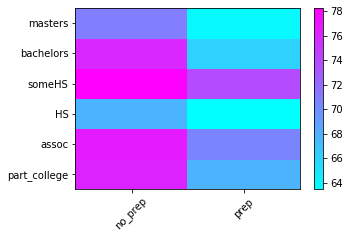

In [68]:
print('Now we create the heat map for reading scores as a function of parental education level and test prep.')
print('I don\'t think I did this correctly because the test-prep scores look lower.')
yList=['part_college','assoc','HS','someHS','bachelors','masters']
xList=['no_prep','prep']
#plt.pcolor(df_pivot,cmap='spring')
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25,left=0.25) # make room for labels

heatmap = ax.pcolor(df_pivot, cmap="cool")
cbar = plt.colorbar(heatmap)

# Set ticks in center of cells
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

# Rotate the xlabels. Set x and y labels as header lists
ax.set_xticklabels(xList,rotation=45)
ax.set_yticklabels(yList)
plt.show()

Just one more test with the heat map, using input values.
I found this array in a discussion of bivalves. Not sure how sex can be a continuous value.
I made up the x-axis labels.


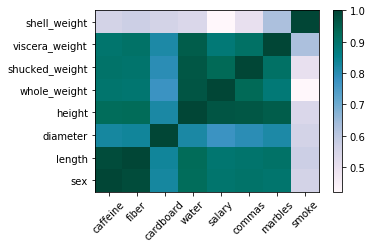

In [69]:
print('Just one more test with the heat map, using input values.')
print('I found this array in a discussion of bivalves. Not sure how sex can be a continuous value.')
print('I made up the x-axis labels.')
df_corry = pd.DataFrame([
 [ 1.        ,  0.98681158,  0.82755361,  0.92526117,  0.89791366,  0.9030177 ,  0.89770557,  0.55671958],
 [ 0.98681158,  1.        ,  0.83368369,  0.9254521 ,  0.89316248,  0.89972443,  0.90532978,  0.57465985],
 [ 0.82755361,  0.83368369,  1.        ,  0.81922077,  0.77497229,  0.7983193 ,  0.81733801,  0.55746732],
 [ 0.92526117,  0.9254521 ,  0.81922077,  1.        ,  0.96940546,  0.96637508,  0.95535544,  0.54038968],
 [ 0.89791366,  0.89316248,  0.77497229,  0.96940546,  1.        ,  0.93196132,  0.88261706,  0.42088366],
 [ 0.9030177 ,  0.89972443,  0.7983193 ,  0.96637508,  0.93196132,  1.        ,  0.90765632,  0.50381925],
 [ 0.89770557,  0.90532978,  0.81733801,  0.95535544,  0.88261706,  0.90765632,  1.        ,  0.62757404],
 [ 0.55671958,  0.57465985,  0.55746732,  0.54038968,  0.42088366,  0.50381925,  0.62757404,  1.        ]
 ])

headers1 = ["sex", "length","diameter", "height", "whole_weight", "shucked_weight","viscera_weight","shell_weight","rings"]
headers2=['caffeine','fiber','cardboard','water','salary','commas','marbles','smoke','mirrors']

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25,left=0.25) # make room for labels

heatmap = ax.pcolor(df_corry, cmap="PuBuGn")
cbar = plt.colorbar(heatmap)

# Set ticks in center of cells
ax.set_xticks(np.arange(df_corry.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_corry.shape[0]) + 0.5, minor=False)

# Rotate the xlabels. Set x and y labels as header lists
ax.set_xticklabels(headers2,rotation=45)
ax.set_yticklabels(headers1)
plt.show()

In [70]:
print('Thank you!')

Thank you!
